# Sistem Predictive Analysis Diabetes - NutriAI

Loading kaggle.json

In [53]:
from google.colab import files
import os
import shutil

# Membuat folder .kaggle jika belum ada
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Memindahkan kaggle.json ke ~/.kaggle
shutil.move("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))

# Memberikan permission ke file tersebut
!chmod 600 ~/.kaggle/kaggle.json

Mengimport & menunzip dataset dari kaggle

In [54]:
# Download kaggle dataset and unzip the file
!kaggle datasets download -d rabieelkharoua/diabetes-health-dataset-analysis
!unzip diabetes-health-dataset-analysis.zip

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/diabetes-health-dataset-analysis
License(s): Attribution 4.0 International (CC BY 4.0)
diabetes-health-dataset-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  diabetes-health-dataset-analysis.zip
  inflating: diabetes_data.csv       


# Data Understanding

## EDA

<h5>Daftar list Fitur-fitur dalam dataset dan deskripsinya :</h5>

<p><strong>ID Pasien</strong></p>

<ul>
  <li><strong>PatientID</strong> : Sebuah pengenal unik yang diberikan kepada setiap pasien (6000 hingga 7878).</li>
</ul>

<p><strong>Detail Demografis</strong></p>    

<ul>
  <li><strong>Age</strong> : Usia pasien, berkisar antara 20 hingga 90 tahun.</li>
  <li><strong>Gender</strong> : Jenis kelamin pasien, di mana:
    <ul>
      <li>0: Laki-laki</li>
      <li>1: Perempuan</li>
    </ul>
  </li>
  <li><strong>Ethnicity</strong> : Etnisitas pasien, dikodekan sebagai berikut:
    <ul>
      <li>0: Kaukasia</li>
      <li>1: Afrika-Amerika</li>
      <li>2: Asia</li>
      <li>3: Lainnya</li>
    </ul>
  </li>
  <li><strong>SocioeconomicStatus</strong> : Status sosial ekonomi pasien, dikodekan sebagai berikut:
    <ul>
      <li>0: Rendah</li>
      <li>1: Menengah</li>
      <li>2: Tinggi</li>
    </ul>
  </li>
  <li><strong>EducationLevel</strong> : Tingkat pendidikan pasien, dikodekan sebagai berikut:
    <ul>
      <li>0: Tidak ada pendidikan formal</li>
      <li>1: Sekolah Menengah (SMA)</li>
      <li>2: Sarjana (S1)</li>
      <li>3: Pascasarjana atau lebih tinggi (S2/S3)</li>
    </ul>
  </li>
</ul>

<p><strong>Faktor Gaya Hidup</strong></p>
<ul>
  <li><strong>BMI</strong> : Indeks Massa Tubuh pasien, berkisar antara 15 hingga 40.</li>
  <li><strong>Smoking</strong> : Status merokok, 0 berarti Tidak dan 1 berarti Ya.</li>
  <li><strong>AlcoholConsumption</strong> : Konsumsi alkohol mingguan dalam satuan, berkisar 0–20.</li>
  <li><strong>PhysicalActivity</strong> : Aktivitas fisik mingguan dalam jam, 0–10.</li>
  <li><strong>DietQuality</strong> : Skor kualitas diet, 0–10.</li>
  <li><strong>SleepQuality</strong> : Skor kualitas tidur, 4–10.</li>
</ul>

<p><strong>Riwayat Medis</strong></p>
<ul>
  <li><strong>FamilyHistoryDiabetes</strong>: Riwayat keluarga dengan diabetes, 0 berarti Tidak dan 1 berarti Ya.</li>
  <li><strong>GestationalDiabetes</strong>: Riwayat diabetes gestasional, 0 berarti Tidak dan 1 berarti Ya.</li>
  <li><strong>PolycysticOvarySyndrome</strong>: Sindrom ovarium polikistik, 0 berarti Tidak dan 1 berarti Ya.</li>
  <li><strong>PreviousPreDiabetes</strong>: Riwayat pre-diabetes sebelumnya, 0 berarti Tidak dan 1 berarti Ya.</li>
  <li><strong>Hypertension</strong>: Hipertensi, 0 berarti Tidak dan 1 berarti Ya.</li>
</ul>

<p><strong>Pengukuran Klinis</strong></p>
<ul>
  <li><strong>SystolicBP</strong>: Tekanan darah sistolik, 90–180 mmHg.</li>
  <li><strong>DiastolicBP</strong>: Tekanan darah diastolik, 60–120 mmHg.</li>
  <li><strong>FastingBloodSugar</strong>: Gula darah puasa, 70–200 mg/dL.</li>
  <li><strong>HbA1c</strong>: Hemoglobin A1c, 4.0%–10.0%.</li>
  <li><strong>SerumCreatinine</strong>: Kreatinin serum, 0.5–5.0 mg/dL.</li>
  <li><strong>BUNLevels</strong>: Blood Urea Nitrogen, 5–50 mg/dL.</li>
  <li><strong>CholesterolTotal</strong>: Kolesterol total, 150–300 mg/dL.</li>
  <li><strong>CholesterolLDL</strong>: Kolesterol LDL, 50–200 mg/dL.</li>
  <li><strong>CholesterolHDL</strong>: Kolesterol HDL, 20–100 mg/dL.</li>
  <li><strong>CholesterolTriglycerides</strong>: Trigliserida, 50–400 mg/dL.</li>
</ul>

<p><strong>Penggunaan Obat-obatan</strong></p>
<ul>
  <li><strong>AntihypertensiveMedications</strong>: Penggunaan obat antihipertensi, 0 berarti Tidak dan 1 berarti Ya.</li>
  <li><strong>Statins</strong>: Penggunaan statin, 0 berarti Tidak dan 1 berarti Ya.</li>
  <li><strong>AntidiabeticMedications</strong>: Penggunaan obat antidiabetes, 0 berarti Tidak dan 1 berarti Ya.</li>
</ul>

<p><strong>Gejala dan Kualitas Hidup</strong></p>
<ul>
  <li><strong>FrequentUrination</strong>: Sering buang air kecil, 0 berarti Tidak dan 1 berarti Ya.</li>
  <li><strong>ExcessiveThirst</strong>: Rasa haus berlebihan, 0 berarti Tidak dan 1 berarti Ya.</li>
  <li><strong>UnexplainedWeightLoss</strong>: Penurunan berat badan tanpa sebab, 0 berarti Tidak dan 1 berarti Ya.</li>
  <li><strong>FatigueLevels</strong>: Tingkat kelelahan, 0–10.</li>
  <li><strong>BlurredVision</strong>: Penglihatan kabur, 0 berarti Tidak dan 1 berarti Ya.</li>
  <li><strong>SlowHealingSores</strong>: Luka yang lambat sembuh, 0 berarti Tidak dan 1 berarti Ya.</li>
  <li><strong>TinglingHandsFeet</strong>: Kesemutan di tangan atau kaki, 0 berarti Tidak dan 1 berarti Ya.</li>
  <li><strong>QualityOfLifeScore</strong>: Skor kualitas hidup, 0–100.</li>
</ul>

<p><strong>Paparan Lingkungan dan Pekerjaan</strong></p>
<ul>
  <li><strong>HeavyMetalsExposure</strong>: Paparan logam berat, 0 berarti Tidak dan 1 berarti Ya.</li>
  <li><strong>OccupationalExposureChemicals</strong>: Paparan bahan kimia di tempat kerja, 0 berarti Tidak dan 1 berarti Ya.</li>
  <li><strong>WaterQuality</strong>: Kualitas air, 0 berarti Baik dan 1 berarti Buruk.</li>
</ul>

<p><strong>Perilaku Kesehatan</strong></p>
<ul>
  <li><strong>MedicalCheckupsFrequency</strong>: Frekuensi pemeriksaan medis per tahun, 0–4.</li>
  <li><strong>MedicationAdherence</strong>: Skor kepatuhan minum obat, 0–10.</li>
  <li><strong>HealthLiteracy</strong>: Skor literasi kesehatan, 0–10.</li>
</ul>

<p><strong>Informasi Diagnosis</strong></p>
<ul>
  <li><strong>Diagnosis</strong>: Status diagnosis diabetes, 0 berarti Tidak dan 1 berarti Ya.</li>
</ul>

<p><strong>Informasi Dokter Penanggung Jawab</strong></p>
<ul>
  <li><strong>DoctorInCharge</strong>: Dokter penanggung jawab pasien. Hanya memiliki 1 nilai unik yaitu "Confidential". Tidak ada data yang hilang.</li>
</ul>






Membaca dan menampilkan 5 baris pertama dari file diabetes_data.csv

In [55]:
import pandas as pd
from IPython.display import display

# df = pd.read_csv('Healthcare-Diabetes.csv')
df = pd.read_csv('diabetes_data.csv')

display(df.head())

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


Menampilkan informasi umum dataset

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1879 non-null   int64  
 1   Age                            1879 non-null   int64  
 2   Gender                         1879 non-null   int64  
 3   Ethnicity                      1879 non-null   int64  
 4   SocioeconomicStatus            1879 non-null   int64  
 5   EducationLevel                 1879 non-null   int64  
 6   BMI                            1879 non-null   float64
 7   Smoking                        1879 non-null   int64  
 8   AlcoholConsumption             1879 non-null   float64
 9   PhysicalActivity               1879 non-null   float64
 10  DietQuality                    1879 non-null   float64
 11  SleepQuality                   1879 non-null   float64
 12  FamilyHistoryDiabetes          1879 non-null   i

Menampikan statistik dataset

In [57]:
df.describe(include='all')

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,...,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confidential
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1879
mean,6939.000000,55.043108,0.487493,0.755721,0.992017,1.699308,27.687601,0.281533,10.096587,5.200790,...,0.111229,48.508643,0.052155,0.103246,0.200639,1.997101,4.957539,5.011736,0.400213,NaN
std,542.564896,20.515839,0.499977,1.047558,0.764940,0.885665,7.190975,0.449866,5.914216,2.857012,...,0.314500,28.758488,0.222400,0.304361,0.400585,1.122632,2.910934,2.920908,0.490072,NaN
min,6000.000000,20.000000,0.000000,0.000000,0.000000,0.000000,15.025898,0.000000,0.000928,0.004089,...,0.000000,0.002390,0.000000,0.000000,0.000000,0.004013,0.005384,0.000362,0.000000,NaN
25%,6469.500000,38.000000,0.000000,0.000000,0.000000,1.000000,21.469981,0.000000,4.789725,2.751022,...,0.000000,23.974098,0.000000,0.000000,0.000000,1.057801,2.420024,2.410113,0.000000,NaN
50%,6939.000000,55.000000,0.000000,0.000000,1.000000,2.000000,27.722988,0.000000,10.173865,5.249002,...,0.000000,47.519693,0.000000,0.000000,0.000000,1.987170,4.843886,5.035208,0.000000,NaN
75%,7408.500000,73.000000,1.000000,1.000000,2.000000,2.000000,33.856460,1.000000,15.285359,7.671402,...,0.000000,72.883179,0.000000,0.000000,0.000000,2.946019,7.513933,7.586865,1.000000,NaN


Menampilkan jumlah missing value

In [58]:
print("Missing values in total:")
print(df.isnull().sum())

Missing values in total:
PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryDiabetes            0
GestationalDiabetes              0
PolycysticOvarySyndrome          0
PreviousPreDiabetes              0
Hypertension                     0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
CholesterolTotal                 0
CholesterolLDL                   0
CholesterolHDL                   0
CholesterolTriglycerides         0
AntihypertensiveMedications   

Menampilkan jumlah data duplikat

In [59]:
duplicate_rows = df[df.duplicated()]
print("Jumlah duplikat:", duplicate_rows.shape[0])

Jumlah duplikat: 0


Memisahkan dataset dengan fitur PatientID dan DoctorInCharge

In [60]:
df_new = df.drop(['PatientID', 'DoctorInCharge'], axis=1)

Mengecek dataframe baru

In [61]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1879 non-null   int64  
 1   Gender                         1879 non-null   int64  
 2   Ethnicity                      1879 non-null   int64  
 3   SocioeconomicStatus            1879 non-null   int64  
 4   EducationLevel                 1879 non-null   int64  
 5   BMI                            1879 non-null   float64
 6   Smoking                        1879 non-null   int64  
 7   AlcoholConsumption             1879 non-null   float64
 8   PhysicalActivity               1879 non-null   float64
 9   DietQuality                    1879 non-null   float64
 10  SleepQuality                   1879 non-null   float64
 11  FamilyHistoryDiabetes          1879 non-null   int64  
 12  GestationalDiabetes            1879 non-null   i

In [62]:
display(df_new.head())

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,44,0,1,2,1,32.985284,1,4.499365,2.443385,4.898831,...,0,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1
1,51,1,0,1,2,39.916764,0,1.578919,8.301264,8.941093,...,0,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1
2,89,1,0,1,3,19.782251,0,1.177301,6.103395,7.722543,...,0,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0
3,21,1,1,1,2,32.376881,1,1.714621,8.645465,4.804044,...,0,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0
4,27,1,0,1,3,16.808600,0,15.462549,4.629383,2.532756,...,0,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0


## Visualisasi

Identifikasi fitur-fitur numerik dan kategorikal

In [63]:
import numpy as np

all_numeric = df_new.select_dtypes(include=np.number).columns

# Identifikasi fitur numerik kontinu (threshold > 10 nilai unik)
numerical_features = [col for col in all_numeric if df_new[col].nunique() > 10 and col != 'Diagnosis']

# Identifikasi fitur numerik kategori (jumlah unique ≤ 10, selain 'Diagnosis')
categorical_numeric = [col for col in all_numeric if df_new[col].nunique() <= 10 and col != 'Diagnosis']

# Identifikasi fitur bertipe objek (biasanya string/kategori)
categorical_object = df_new.select_dtypes(include=['object', 'category']).columns.tolist()

# Gabungkan semuanya jadi satu daftar kategorikal
categorical_features = categorical_numeric + categorical_object

Visualisasi fitur-fitur numerik

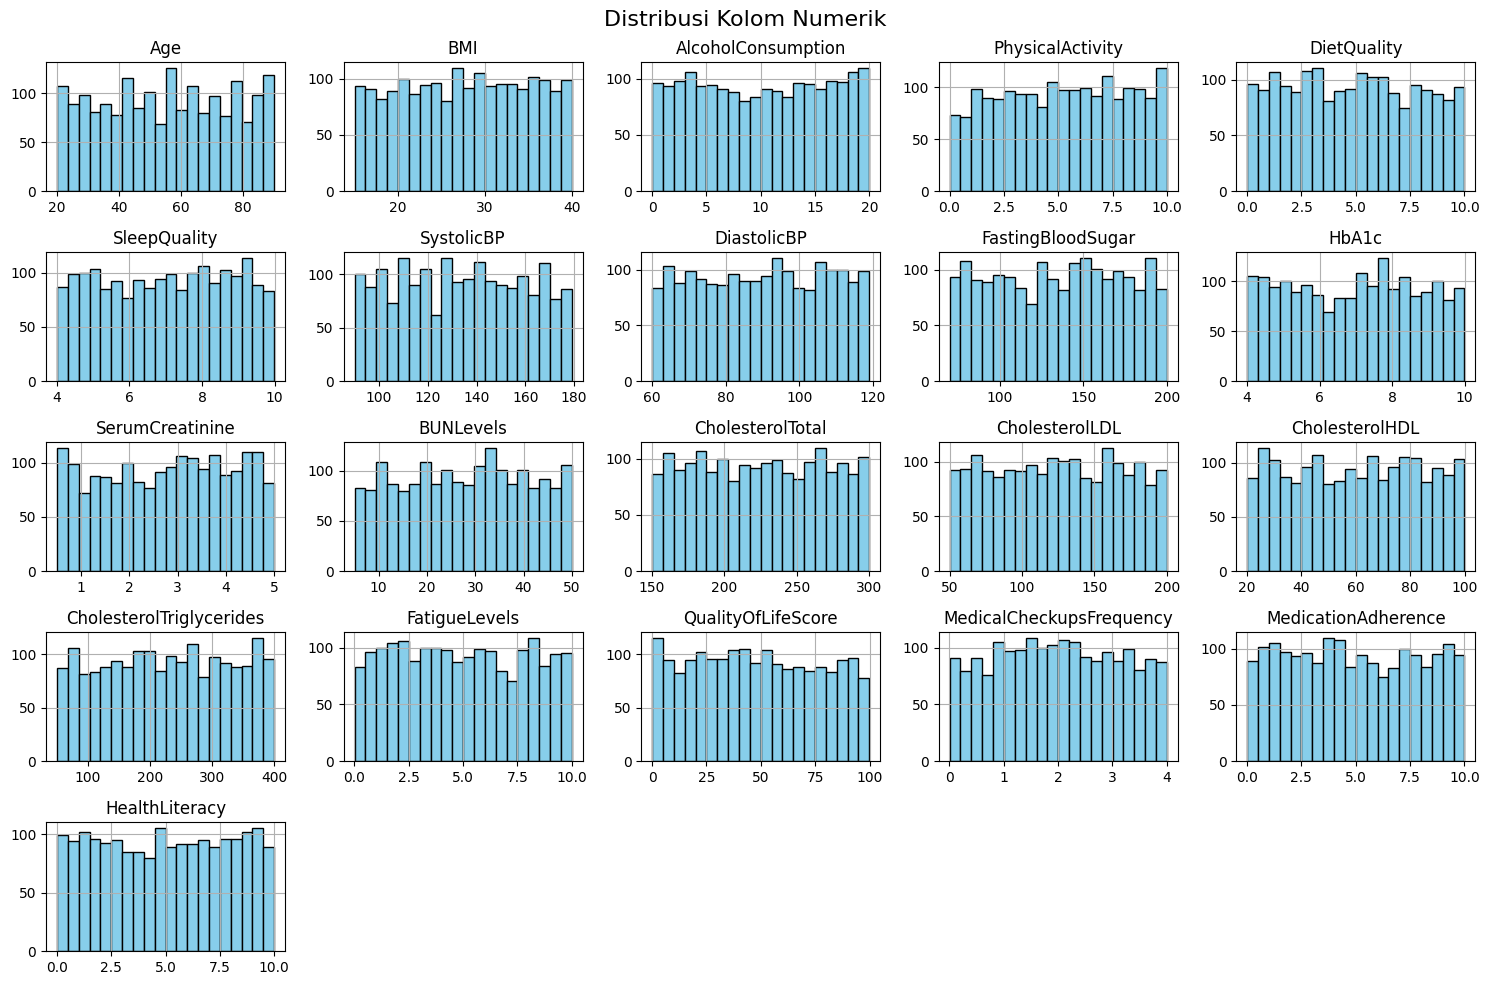

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

df_new[numerical_features].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Kolom Numerik", fontsize=16)
plt.tight_layout()
plt.show()

<h5>Insight Distribusi Kolom Numerik</h5>

<ul>
  <li><b>Age :</b> Distribusi usia cukup merata dari usia muda hingga tua, dengan sedikit dominasi pada usia 50-70 tahun, mencerminkan populasi pasien dengan risiko diabetes atau penyakit metabolik yang meningkat seiring bertambahnya usia.</li>

  <li><b>BMI :</b> Terdistribusi normal dengan puncak pada BMI sekitar 25-30, menunjukkan mayoritas pasien berada dalam kategori overweight atau obesitas ringan, yang merupakan faktor risiko prediabetes.</li>

  <li><b>AlcoholConsumption & PhysicalActivity :</b> Distribusi agak merata, namun terlihat beberapa lonjakan di nilai tertentu. Ini mungkin mencerminkan pengelompokan gaya hidup pasien. Nilai rendah konsumsi alkohol dan aktivitas fisik bisa menjadi red flag terhadap gaya hidup tidak sehat.</li>

  <li><b>DietQuality & SleepQuality :</b> Kedua fitur menunjukkan variasi yang seimbang, tetapi sedikit lebih banyak pasien dengan diet dan tidur yang “cukup baik” (skor 6–8). Ini dapat dikaitkan dengan intervensi kesehatan atau kesadaran pribadi pasien.</li>

  <li><b>SystolicBP & DiastolicBP :</b> Sebagian besar pasien berada dalam rentang tekanan darah normal hingga tinggi. Ini sejalan dengan kecenderungan komplikasi hipertensi pada penderita prediabetes/diabetes.</li>

  <li><b>FastingBloodSugar & HbA1c :</b> Terlihat distribusi menyebar, tetapi banyak pasien dengan kadar gula darah tinggi. Ini konsisten dengan kondisi prediabetes/diabetes.</li>

  <li><b>SerumCreatinine & BUNLevels :</b> Distribusi cukup stabil, meskipun terlihat sedikit konsentrasi nilai di tengah rentang. Ini bisa menunjukkan sebagian pasien mengalami penurunan fungsi ginjal ringan (terkait komplikasi diabetes).</li>

  <li><b>Kolesterol (Total, LDL, HDL, Triglycerides) :</b>
    <ul>
      <li>LDL dan Triglycerides menunjukkan distribusi cukup seimbang namun lebih banyak nilai tinggi.</li>
      <li>HDL memiliki penyebaran dengan mayoritas pasien pada nilai “cukup”, meskipun sedikit pasien memiliki HDL tinggi (yang bersifat protektif).</li>
    </ul>
  </li>

  <li><b>FatigueLevels :</b> Banyak pasien melaporkan tingkat kelelahan sedang hingga tinggi (6–10), yang merupakan gejala umum dari gula darah tidak stabil.</li>

  <li><b>QualityOfLifeScore :</b> Distribusi cukup datar tapi menunjukkan kecenderungan menurun ke arah nilai rendah, menunjukkan banyak pasien merasa kualitas hidup mereka terganggu.</li>

  <li><b>MedicalCheckupsFrequency :</b> Banyak pasien melakukan pemeriksaan kesehatan secara cukup rutin (nilai 2–3), namun masih ada kelompok yang jarang memeriksakan diri.</li>

  <li><b>MedicationAdherence & HealthLiteracy :</b> Meskipun nilai relatif merata, terlihat beberapa pasien dengan nilai rendah, menunjukkan kemungkinan adanya masalah edukasi atau kepatuhan terhadap pengobatan.</li>
</ul>

<p><b>Kesimpulan :</b> Banyak pasien dalam dataset ini menunjukkan karakteristik berisiko tinggi untuk diabetes atau prediabetes seperti BMI tinggi, tekanan darah tinggi, kadar gula darah tinggi, dan kelelahan. Namun, sebagian juga sudah menunjukkan perilaku preventif seperti kontrol medis dan gaya hidup yang moderat.</p>

Visualisais fitur-fitur kategorikal

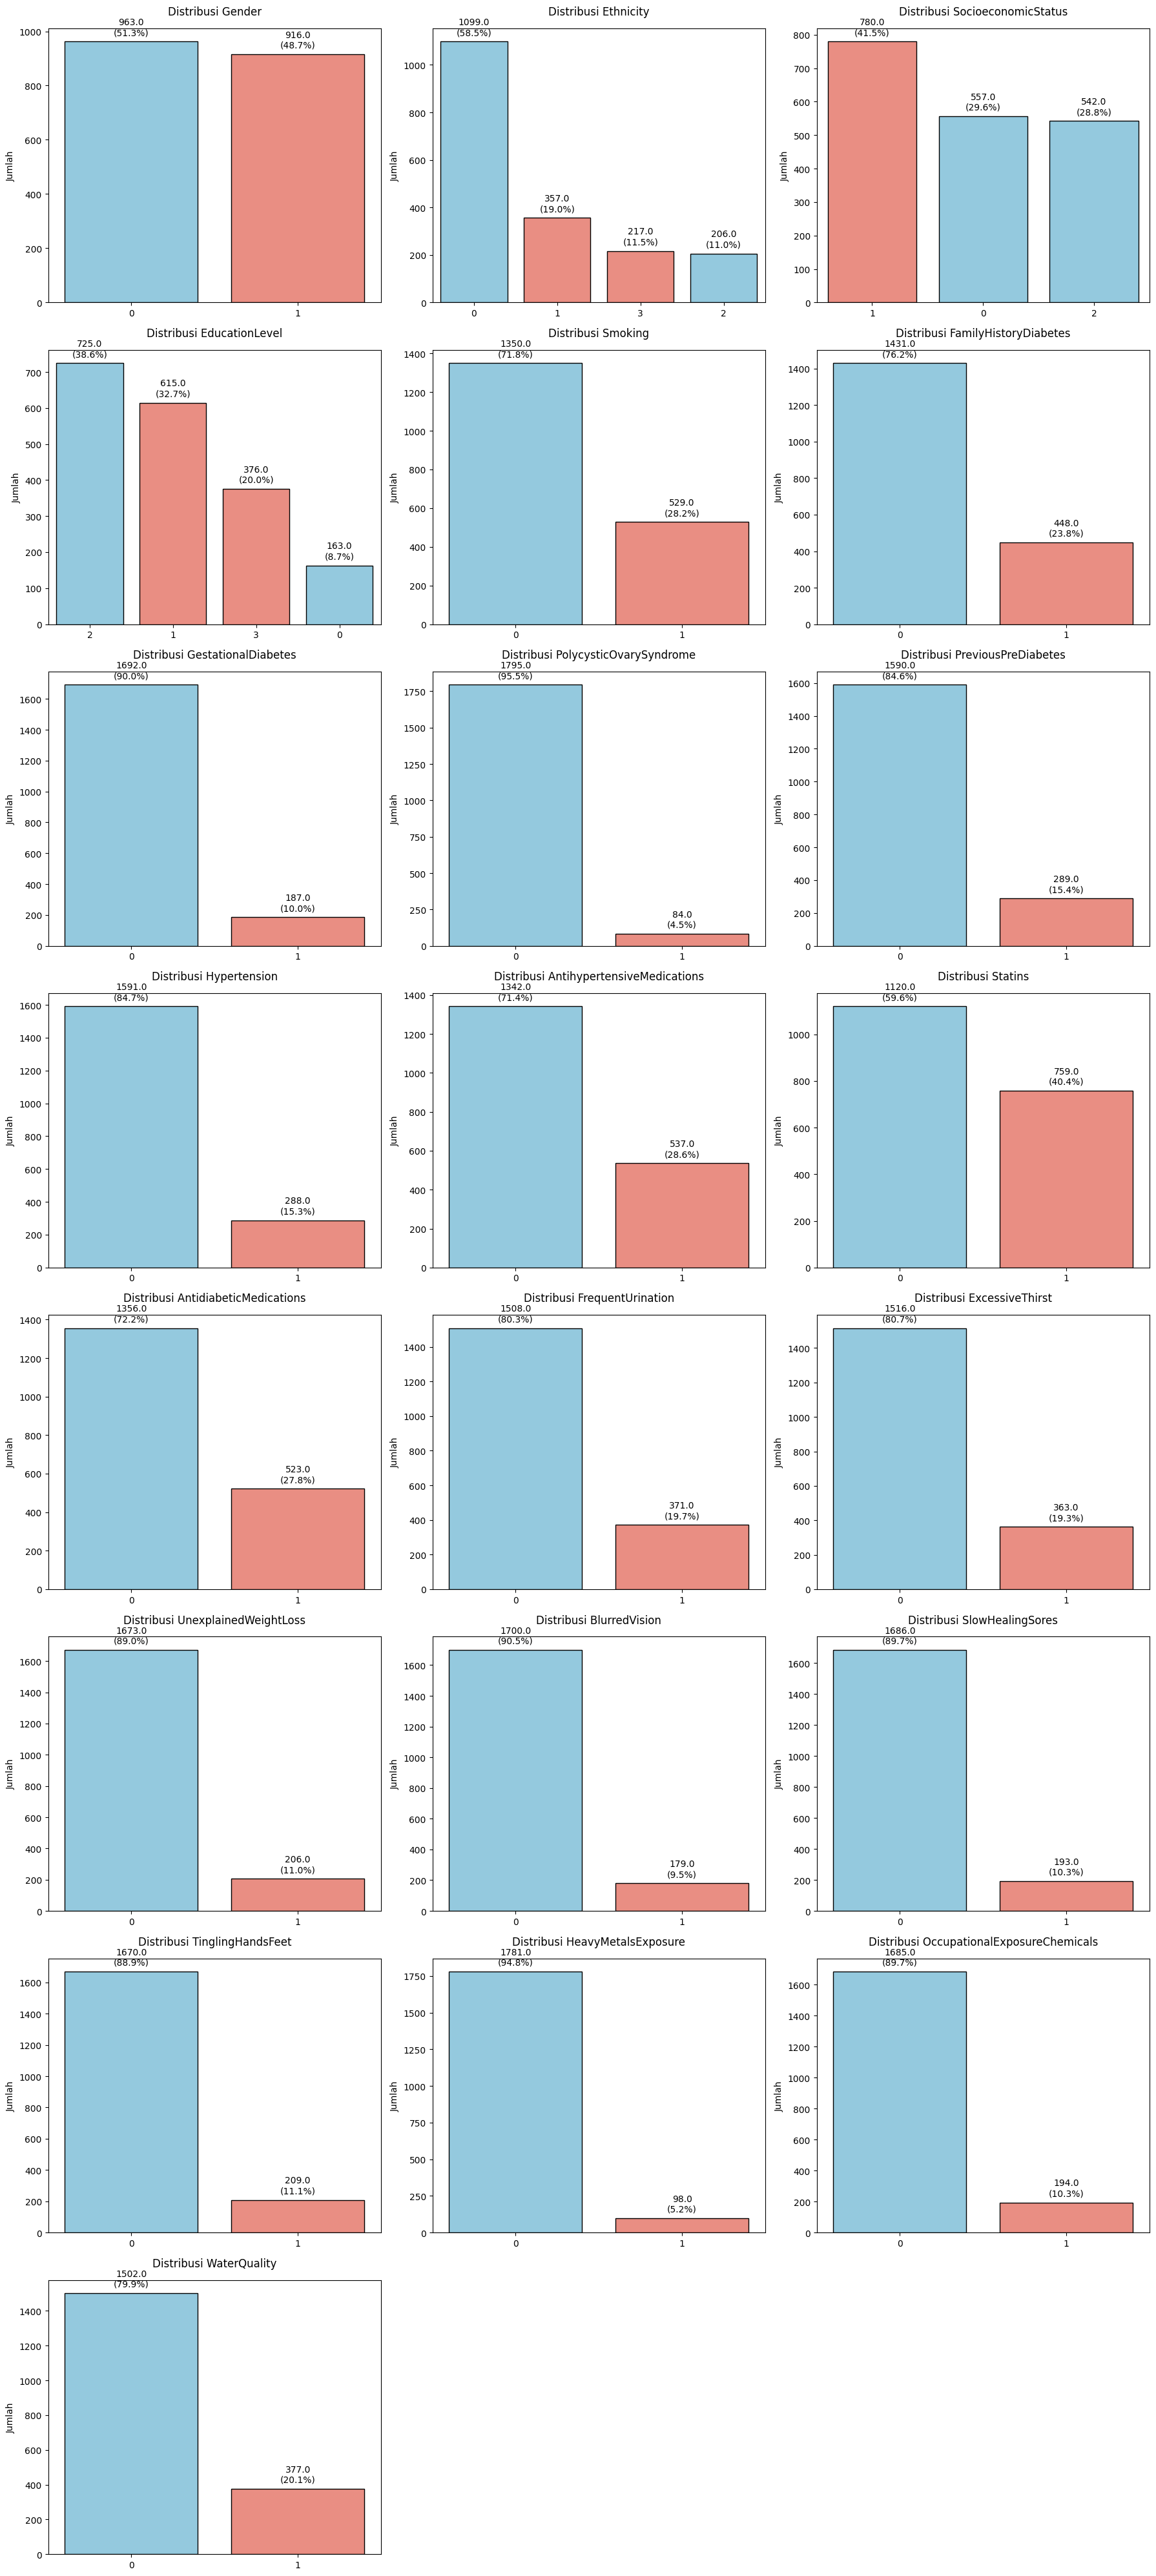

In [65]:
num_cols = len(categorical_features)
n_rows = (num_cols + 2) // 3  # Set ke maksimal 3 kolom per baris

plt.figure(figsize=(18, 5 * n_rows))

for idx, col in enumerate(categorical_features):
    plt.subplot(n_rows, 3, idx + 1)

    order = df_new[col].value_counts().index
    color_palette = ['skyblue', 'salmon'] * (len(order) // 2 + 1)

    ax = sns.countplot(data=df_new, x=col, hue=col, palette=color_palette[:len(order)], order=order, edgecolor='black', legend=False)

    total = len(df_new)
    for p in ax.patches:
        count = p.get_height()
        pct = 100 * count / total
        ax.annotate(f'{count}\n({pct:.1f}%)',
                    (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='bottom',
                    fontsize=10, xytext=(0, 5),
                    textcoords='offset points')

    plt.title(f'Distribusi {col}', fontsize=12, pad=15)
    plt.xlabel('')
    plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

<h5>Insight Distribusi Kolom Kategorikal</h5>

<ul>
  <li><b>Gender :</b> Distribusi gender cukup seimbang antara laki-laki dan perempuan, menunjukkan data tidak bias terhadap jenis kelamin tertentu.</li>

  <li><b>Ethnicity :</b> Mayoritas pasien berasal dari satu kelompok etnis dominan (~58%), dengan sisanya tersebar merata di kelompok etnis lainnya. Ini menunjukkan keragaman etnis yang masih terbatas.</li>

  <li><b>SocioeconomicStatus :</b> Distribusi relatif merata, meskipun status ekonomi 1 paling banyak (~41%). Hal ini bisa mencerminkan beban penyakit yang lebih besar di populasi berpenghasilan rendah.</li>

  <li><b>EducationLevel :</b> Sebagian besar pasien memiliki tingkat pendidikan 1 dan 2. Pendidikan tinggi masih jarang (~9%), yang mungkin berpengaruh terhadap pemahaman dan pengelolaan kondisi kesehatan.</li>

  <li><b>Smoking :</b> Sekitar 28% pasien adalah perokok. Meskipun bukan mayoritas, angka ini signifikan dan perlu diperhatikan sebagai faktor risiko tambahan.</li>

  <li><b>FamilyHistoryDiabetes :</b> Sebagian besar pasien (~76%) tidak memiliki riwayat keluarga diabetes. Namun, sisanya yang memiliki riwayat bisa menjadi kelompok dengan risiko genetik lebih tinggi.</li>

  <li><b>GestationalDiabetes & PolycysticOvarySyndrome :</b> Kedua kondisi ini relatif jarang (sekitar 10% dan 5% masing-masing), sesuai dengan sifatnya sebagai faktor risiko spesifik untuk subpopulasi tertentu (wanita).</li>

  <li><b>PreviousPreDiabetes :</b> Hanya sekitar 13.5% yang pernah terdiagnosis prediabetes sebelumnya, menunjukkan sebagian besar kasus mungkin belum terdeteksi atau tidak terpantau secara klinis.</li>

  <li><b>Hypertension :</b> Sebanyak 15.7% pasien memiliki hipertensi, konsisten dengan hubungan antara tekanan darah tinggi dan risiko diabetes.</li>

  <li><b>AntihypertensiveMedications & Statins :</b> Sekitar 26–40% pasien menggunakan obat antihipertensi atau statin. Ini menunjukkan adanya upaya pengendalian faktor risiko kardiometabolik.</li>

  <li><b>AntidiabeticMedications :</b> Sekitar 27.8% pasien menggunakan obat diabetes, mengindikasikan sebagian besar pasien sudah dalam tahap perawatan aktif.</li>

  <li><b>FrequentUrination, ExcessiveThirst, FatigueLevels, TinglingHandsFeet, BlurredVision, SlowHealingSores :</b>
    <ul>
      <li>Gejala klasik prediabetes/diabetes ini muncul pada 10–20% pasien. Jumlah ini cukup besar untuk dianggap signifikan dan perlu perhatian dalam skrining gejala.</li>
    </ul>
  </li>

  <li><b>UnexplainedWeightLoss :</b> Terjadi pada sekitar 11% pasien, bisa menjadi indikator kondisi metabolik yang berat (misalnya diabetes tipe 1 atau dekompensasi berat).</li>

  <li><b>HeavyMetalsExposure & OccupationalExposureChemicals :</b> Masing-masing hanya 8–10% pasien yang melaporkan paparan, menunjukkan potensi risiko lingkungan yang kecil namun tidak bisa diabaikan.</li>

  <li><b>WaterQuality :</b> Sekitar 20% pasien mengalami masalah kualitas air, bisa berdampak tidak langsung terhadap kesehatan secara umum.</li>
</ul>

<p><b>Kesimpulan :</b> Dataset ini menunjukkan proporsi gejala klasik diabetes yang cukup tinggi, ditambah dengan faktor risiko seperti hipertensi, kebiasaan merokok, dan penggunaan obat-obatan terkait metabolik. Sementara sebagian besar pasien belum terdiagnosis prediabetes sebelumnya, keberadaan gejala dan faktor risiko memperkuat perlunya skrining proaktif. Aspek sosial-ekonomi dan pendidikan juga terlihat berperan dalam distribusi risiko.</p>

<h1>Visualisasi Boxplot</h1>

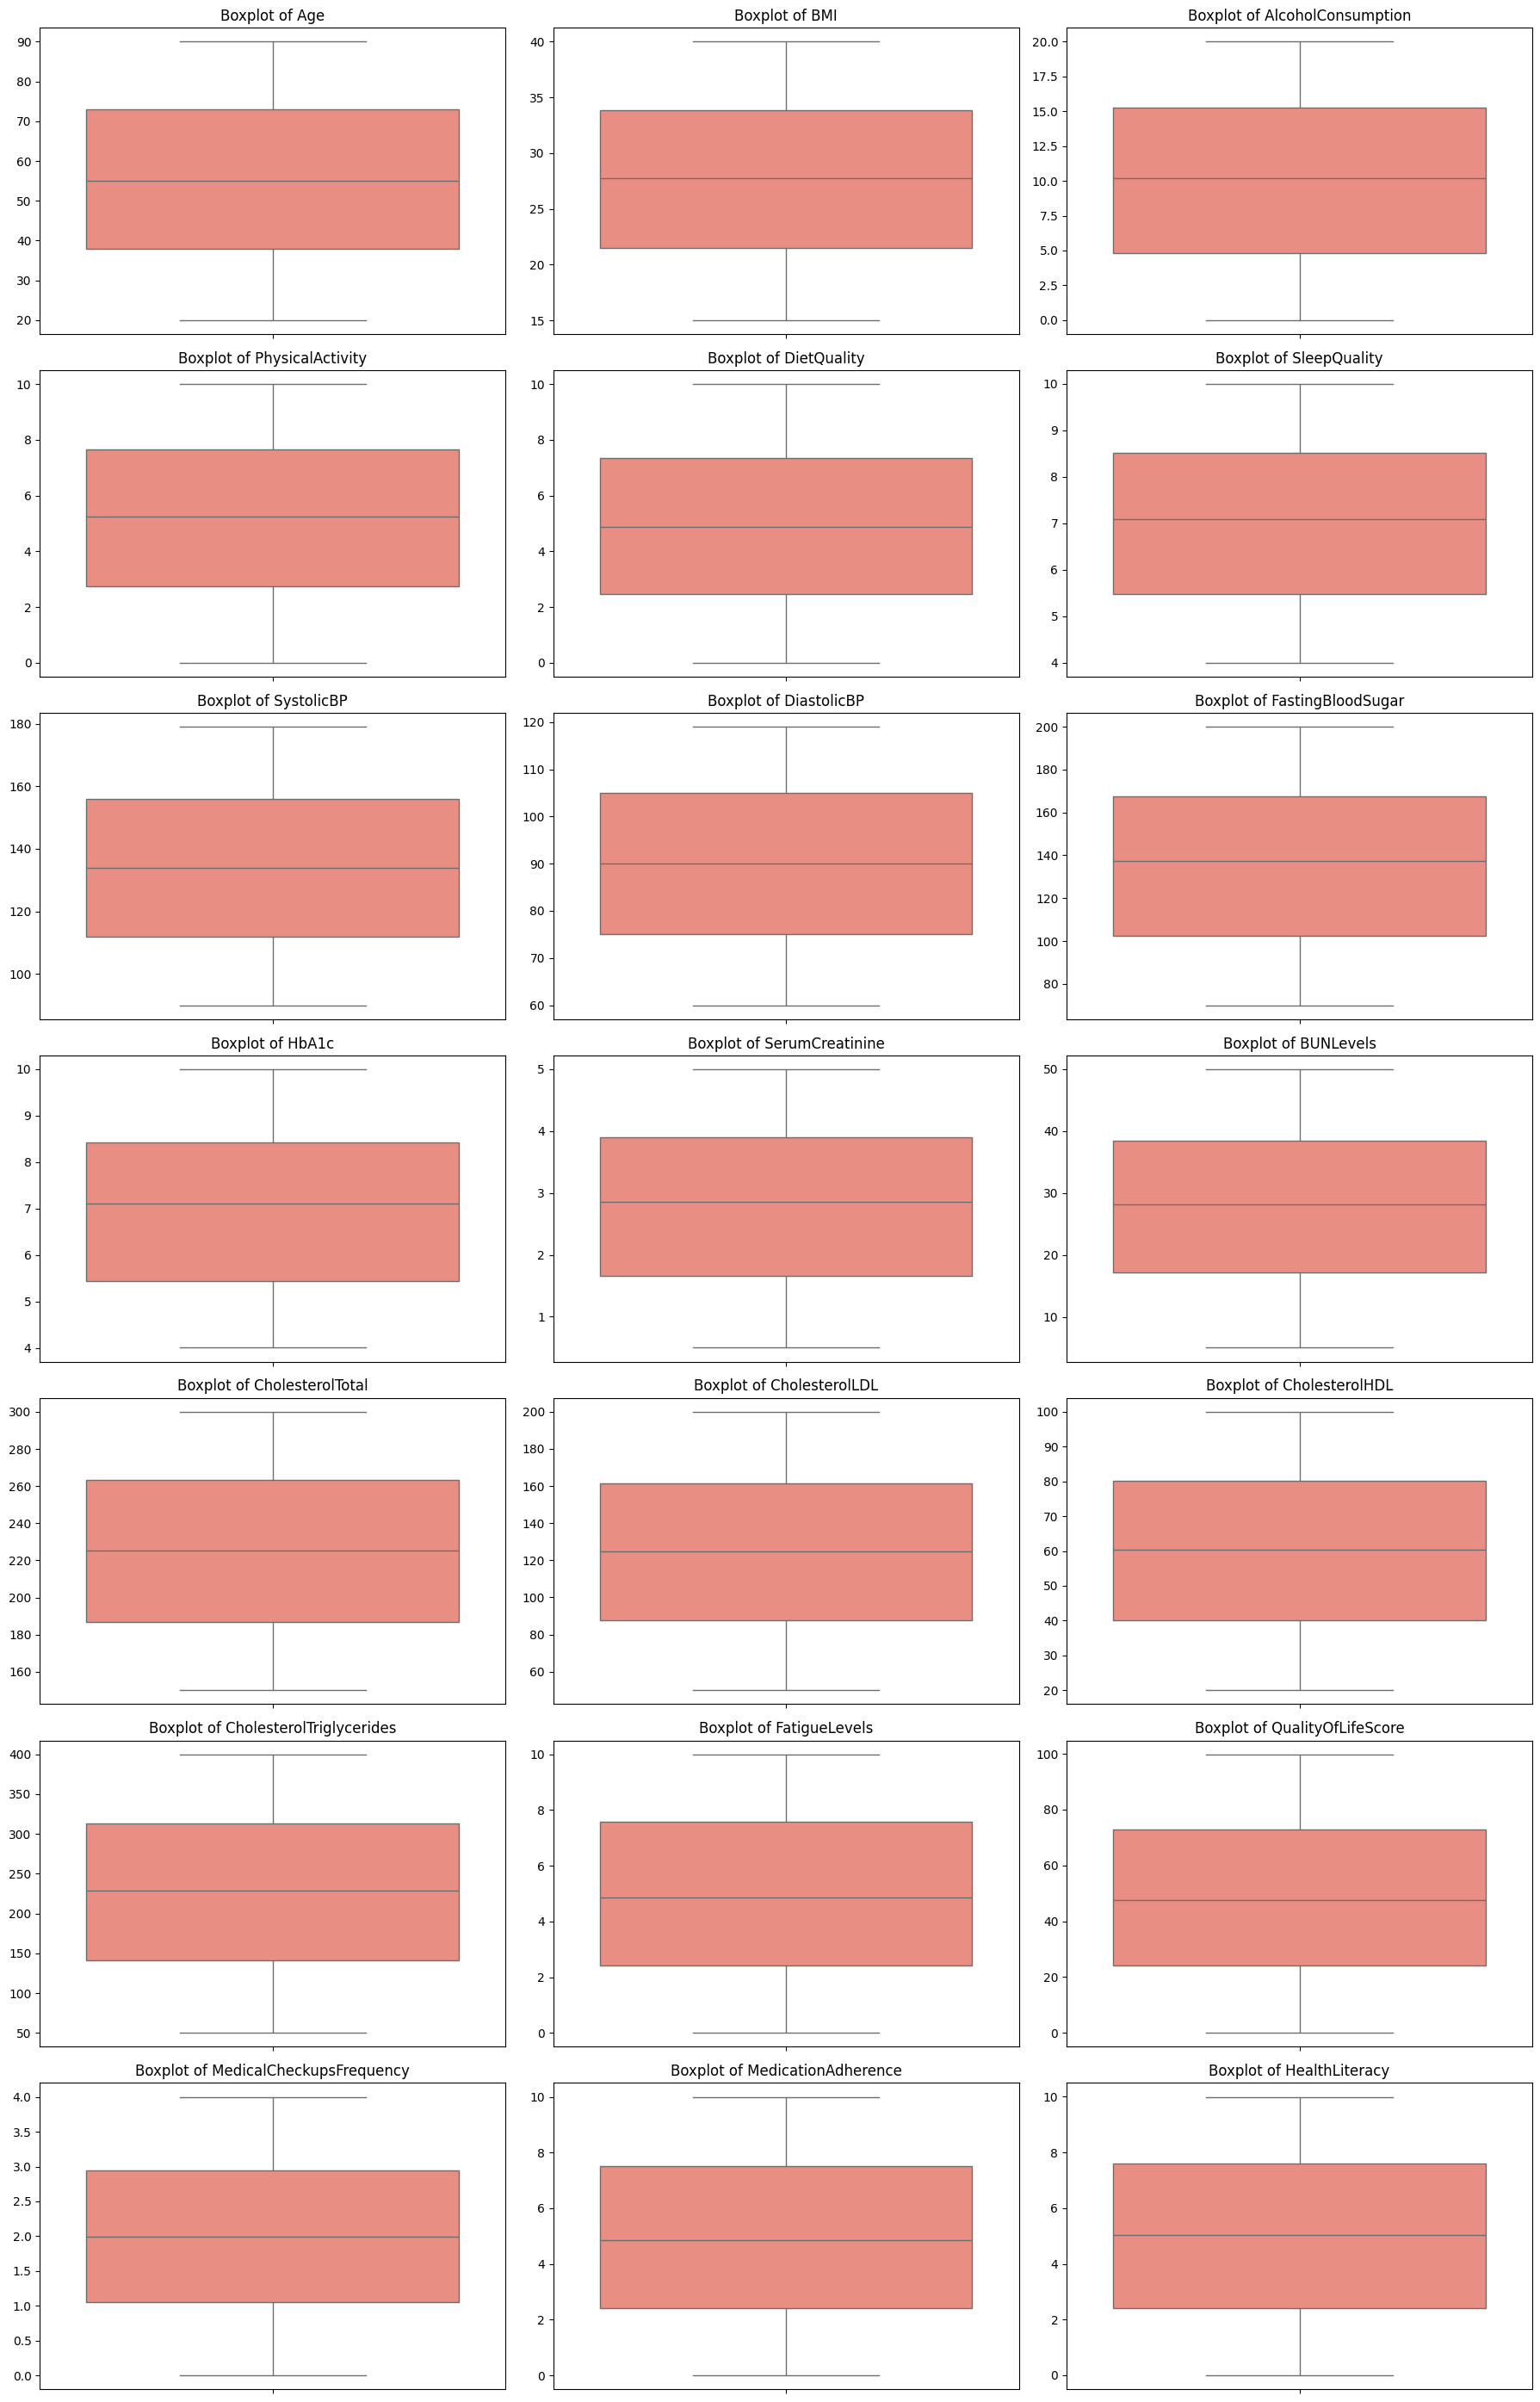

In [66]:
import warnings

warnings.filterwarnings("ignore")

n_cols = 3  # Jumlah kolom subplot
n_rows = (len(numerical_features) + n_cols - 1) // n_cols  # Hitung jumlah baris

plt.figure(figsize=(n_cols * 6, n_rows * 4))  # Ukuran figure menyesuaikan jumlah plot

for idx, col in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.boxplot(data=df_new, y=col, color='salmon')
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')
    plt.xlabel('')

plt.tight_layout()
plt.show()

<h5>Insight Visualisasi Outlier</h5>

<ul>
  <li>
  Berdasarkan hasil visualisasi, tidak ada fitur yang punya outlier.
  </li>
</ul>

# Pre-processing Data

## Konversi Tipe Data

Menampilkan nilai unik dari masing-masing kolom kategorikal guna menentukan jenis encoding yang tepat untuk setiap fitur.  

In [67]:
for col in ['Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel']:
    print(f"{col}: {df_new[col].unique()}")

Gender: [0 1]
Ethnicity: [1 0 2 3]
SocioeconomicStatus: [2 1 0]
EducationLevel: [1 2 3 0]


Melakukan One-hot encoding pada kolom Ethnicity dan SocioeconomicStatus untuk mengonversi kategori nominal menjadi variabel biner independen dan menghindari asumsi urutan.

In [68]:
df_encoded = pd.get_dummies(df_new, columns=['Ethnicity', 'SocioeconomicStatus'], drop_first=True, dtype=int)

In [69]:
df_encoded.head()

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryDiabetes,...,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,Ethnicity_1,Ethnicity_2,Ethnicity_3,SocioeconomicStatus_1,SocioeconomicStatus_2
0,44,0,1,32.985284,1,4.499365,2.443385,4.898831,4.049885,1,...,0,1.782724,4.486980,7.211349,1,1,0,0,0,1
1,51,1,2,39.916764,0,1.578919,8.301264,8.941093,7.508150,0,...,1,3.381070,5.961705,5.024612,1,0,0,0,1,0
2,89,1,3,19.782251,0,1.177301,6.103395,7.722543,7.708387,1,...,0,2.701019,8.950821,7.034944,0,0,0,0,1,0
3,21,1,2,32.376881,1,1.714621,8.645465,4.804044,6.286548,1,...,1,1.409056,3.124769,4.717774,0,1,0,0,1,0
4,27,1,3,16.808600,0,15.462549,4.629383,2.532756,9.771125,0,...,0,1.218452,6.977741,7.887940,0,0,0,0,1,0


## Data Splitting

Membagi data test dan data train dengan perbandingan 80 (train) & 20 (test) dikarenakan ukuran data yang terbilang sedikit.

In [70]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Diagnosis', axis=1)
y = df_encoded['Diagnosis']

# Split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [71]:
print(f'Total sample di dataset : {len(X)}')
print(f'Total sample di dataset train : {len(X_train)}')
print(f'Total sample di dataset test : {len(X_test)}')

Total sample di dataset : 1879
Total sample di dataset train : 1503
Total sample di dataset test : 376


## Normalisasi Fitur-fitur Numerik

Menormalisasi fitur numerik kontinu pada data latih dan uji ke rentang 0–1 menggunakan MinMaxScaler agar skala data seragam.

In [72]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi scaler
minmax_scaler = MinMaxScaler()

# Fit dan transform data latih
X_train[numerical_features] = minmax_scaler.fit_transform(X_train[numerical_features])

# Transform data uji menggunakan scaler yang sama
X_test[numerical_features] = minmax_scaler.transform(X_test[numerical_features])

X_test[numerical_features].head()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,...,BUNLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,FatigueLevels,QualityOfLifeScore,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy
1686,0.442857,0.734653,0.153114,0.720608,0.583987,0.735983,0.337079,0.135593,0.646229,0.873418,...,0.313666,0.069500,0.405181,0.782506,0.547855,0.576120,0.617688,0.578413,0.756081,0.355206
166,0.428571,0.572923,0.613494,0.094211,0.474917,0.163402,0.089888,0.406780,0.680763,1.000232,...,0.034670,0.644598,0.149470,0.983138,0.824800,0.349224,0.517607,0.315183,0.620748,0.893189
24,0.700000,0.835299,0.029025,0.870383,0.013475,0.353529,0.808989,0.186441,0.102299,0.407678,...,0.972258,0.264028,0.297898,0.924163,0.057684,0.550244,0.153219,0.686875,0.878430,0.830639
735,0.228571,0.876479,0.403406,0.106201,0.425457,0.694329,0.865169,0.084746,0.512562,0.162108,...,0.974140,0.046857,0.415544,0.578563,0.617292,0.100154,0.385015,0.534272,0.402913,0.156753
911,0.771429,0.316079,0.194248,0.297028,0.992291,0.403739,0.606742,1.000000,0.586832,0.991724,...,0.466586,0.743813,0.601794,0.816481,0.641734,0.317638,0.180421,0.833040,0.949362,0.269618


# Modeling

### Model Neural Network

Membangun dan meng-compile model neural network dengan 3 hidden layer ReLU, dropout untuk regularisasi, dan output sigmoid untuk klasifikasi biner.

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_neural_network = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model_neural_network.compile(optimizer=Adam(learning_rate=0.0008),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training Model

In [74]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_neural_network = model_neural_network.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.5505 - loss: 0.6966 - val_accuracy: 0.6170 - val_loss: 0.6609
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5864 - loss: 0.6715 - val_accuracy: 0.6037 - val_loss: 0.6405
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5978 - loss: 0.6602 - val_accuracy: 0.7101 - val_loss: 0.6188
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6566 - loss: 0.6253 - val_accuracy: 0.7580 - val_loss: 0.5686
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6603 - loss: 0.6015 - val_accuracy: 0.7793 - val_loss: 0.5173
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6912 - loss: 0.5486 - val_accuracy: 0.7952 - val_loss: 0.4864
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7302 - loss: 0.5447 - val_accuracy: 0.8165 - val_loss: 0.4475
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7484 - loss: 0.5155 - val_accuracy: 0.8138 - 

## Model Logistic Regression

Membangun model logistic regression sebagai jaringan saraf dengan satu neuron beraktivasi sigmoid dan mengkompilasinya menggunakan optimizer Adam, fungsi loss binary crossentropy, serta metrik akurasi.

In [75]:
model_logistic_regression = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

model_logistic_regression.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

Training Model

In [76]:
history_logistic_regression = model_logistic_regression.fit(X_train, y_train,
                                  validation_data=(X_test, y_test),
                                  epochs=100,
                                  batch_size=32,
                                  callbacks=[early_stop])

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6041 - loss: 0.7276 - val_accuracy: 0.5798 - val_loss: 0.6823
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5744 - loss: 0.6888 - val_accuracy: 0.5878 - val_loss: 0.6739
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5765 - loss: 0.6854 - val_accuracy: 0.5931 - val_loss: 0.6670
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5589 - loss: 0.6927 - val_accuracy: 0.5904 - val_loss: 0.6602
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5951 - loss: 0.6701 - val_accuracy: 0.6090 - val_loss: 0.6534
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5978 - loss: 0.6592 - val_accuracy: 0.6117 - val_loss: 0.6471
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5720 - loss: 0.6647 - val_accuracy: 0.6170 - val_loss: 0.6406
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5944 - loss: 0.6638 - val_accuracy: 0.6303 - 

## Model Wide & Deep

Membangun dan mengkompilasi model Wide & Deep yang menggabungkan output dari model linear (wide) dan jaringan saraf dalam (deep) sebelum diproses oleh layer sigmoid akhir untuk prediksi biner.

In [77]:
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras.models import Model

input_layer = Input(shape=(X_train.shape[1],))
wide = Dense(1, activation='sigmoid')(input_layer)
deep = Dense(128, activation='relu')(input_layer)
deep = Dropout(0.3)(deep)
deep = Dense(64, activation='relu')(deep)
deep = Dense(1, activation='sigmoid')(deep)

# gabungkan wide dan deep output
output = Concatenate()([wide, deep])
final_output = Dense(1, activation='sigmoid')(output)

model_wide_and_deep = Model(inputs=input_layer, outputs=final_output)
model_wide_and_deep.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Training Model

In [78]:
history_wide_and_deep = model_wide_and_deep.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop])

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.6080 - loss: 0.6651 - val_accuracy: 0.6011 - val_loss: 0.6569
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5958 - loss: 0.6577 - val_accuracy: 0.6303 - val_loss: 0.6343
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6581 - loss: 0.6287 - val_accuracy: 0.7340 - val_loss: 0.5960
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7279 - loss: 0.6029 - val_accuracy: 0.7686 - val_loss: 0.5734
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7618 - loss: 0.5798 - val_accuracy: 0.7660 - val_loss: 0.5669
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7607 - loss: 0.5727 - val_accuracy: 0.8032 - val_loss: 0.5444
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8119 - loss: 0.5471 - val_accuracy: 0.8245 - val_loss: 0.5561
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8051 - loss: 0.5481 - val_accuracy: 0.8271 - 

# Evaluasi

## Evaluasi Model Neural Network

Melakukan evaluasi dengan metriks evaluasi precision_score, recall_score, f1_score, accuracy_score.

In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Prediksi probabilitas dari model untuk data uji
y_pred = (model_neural_network.predict(X_test) > 0.5).astype(int)

# Hitung accuracy, precision, recall, dan f1_score prediksi terhadap data uji
acc_opt   = accuracy_score(y_test, y_pred)
prec_opt  = precision_score(y_test, y_pred)
rec_opt   = recall_score(y_test, y_pred)
f1_opt    = f1_score(y_test, y_pred)

print("Hasil Evaluasi : ")
print(f"Accuracy : {acc_opt:.4f}")
print(f"Precision: {prec_opt:.4f}")
print(f"Recall   : {rec_opt:.4f}")
print(f"F1 Score : {f1_opt:.4f}\n")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Hasil Evaluasi : 
Accuracy : 0.8351
Precision: 0.8333
Recall   : 0.7333
F1 Score : 0.7801



Visualisasi Confusion Matrix

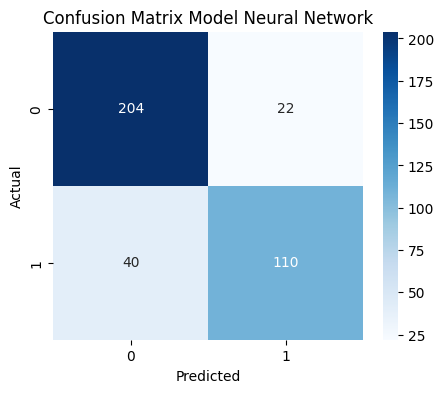

In [80]:
from sklearn.metrics import confusion_matrix

cm_neural_network = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm_neural_network, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Model Neural Network')
plt.show()

## Evaluasi Model Logistic Regression

Melakukan evaluasi dengan metriks evaluasi precision_score, recall_score, f1_score, accuracy_score.

In [81]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Prediksi probabilitas dari model untuk data uji
y_pred2 = (model_logistic_regression.predict(X_test) > 0.5).astype(int)

# Hitung accuracy, precision, recall, dan f1_score prediksi terhadap data uji
acc_opt   = accuracy_score(y_test, y_pred2)
prec_opt  = precision_score(y_test, y_pred2)
rec_opt   = recall_score(y_test, y_pred2)
f1_opt    = f1_score(y_test, y_pred2)

print("Hasil Evaluasi : ")
print(f"Accuracy : {acc_opt:.4f}")
print(f"Precision: {prec_opt:.4f}")
print(f"Recall   : {rec_opt:.4f}")
print(f"F1 Score : {f1_opt:.4f}\n")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Hasil Evaluasi : 
Accuracy : 0.8112
Precision: 0.7801
Recall   : 0.7333
F1 Score : 0.7560



Visualisasi Confusion Matrix

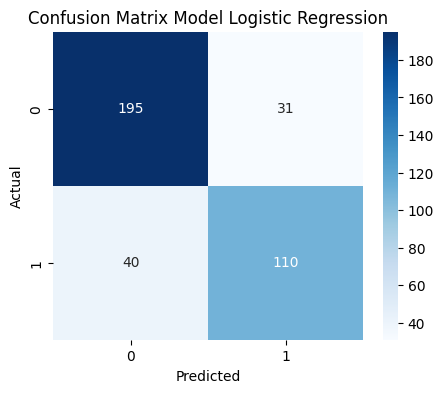

In [82]:
cm_logistic_regression = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(5,4))
sns.heatmap(cm_logistic_regression, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Model Logistic Regression')
plt.show()

## Evaluasi Model Wide & Deep

Melakukan evaluasi dengan metriks evaluasi precision_score, recall_score, f1_score, accuracy_score.

In [83]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Prediksi probabilitas dari model untuk data uji
y_pred3 = (model_wide_and_deep.predict(X_test) > 0.5).astype(int)

# Hitung accuracy, precision, recall, dan f1_score prediksi terhadap data uji
acc_opt   = accuracy_score(y_test, y_pred3)
prec_opt  = precision_score(y_test, y_pred3)
rec_opt   = recall_score(y_test, y_pred3)
f1_opt    = f1_score(y_test, y_pred3)

print("Hasil Evaluasi : ")
print(f"Accuracy : {acc_opt:.4f}")
print(f"Precision: {prec_opt:.4f}")
print(f"Recall   : {rec_opt:.4f}")
print(f"F1 Score : {f1_opt:.4f}\n")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Hasil Evaluasi : 
Accuracy : 0.8484
Precision: 0.8163
Recall   : 0.8000
F1 Score : 0.8081



Visualisasi Confusion Matrix

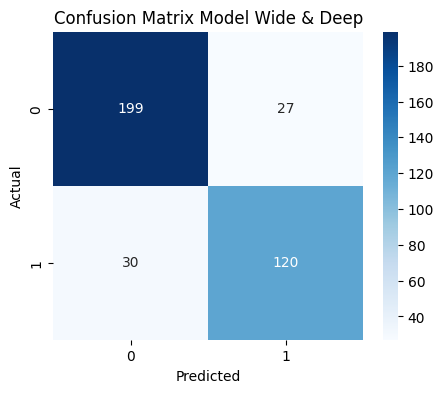

In [84]:
cm_wide_and_deep = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(5,4))
sns.heatmap(cm_wide_and_deep, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Model Wide & Deep')
plt.show()

# Membangun Model Rekomendasi

Menentukan fitur numerik kontinu non-demografis dari dataset untuk digunakan dalam sistem rekomendasi.

In [85]:
# Fitur-fitur demografis statis
demographic_features = ['Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel']

# numerical_features awal
all_numeric2 = df_new.select_dtypes(include=np.number).columns
numerical_features2 = [col for col in all_numeric2 if df_new[col].nunique() > 10 and col != 'Diagnosis']

# Exclude fitur demografis dari rekomendasi
numerical_features2 = [col for col in numerical_features2 if col not in demographic_features]

Membuat salinan data untuk mengembalikan fitur numerik ke skala aslinya setelah normalisasi.

In [86]:
# Buat salinan data untuk undo normalisasi
X_train_rec = X_train.copy()
X_test_rec = X_test.copy()

Mengembalikan nilai fitur numerik ke skala aslinya menggunakan inverse transform dari MinMaxScaler.

In [87]:
# Undo normalisasi MinMax (ubah kembali ke skala asli)
X_train_rec[numerical_features] = minmax_scaler.inverse_transform(X_train[numerical_features])
X_test_rec[numerical_features] = minmax_scaler.inverse_transform(X_test[numerical_features])

Melakukan clustering KMeans pada data non-diabetes untuk menemukan pusat cluster menggunakan fitur numerik kontinu dalam skala asli.

In [88]:
from sklearn.cluster import KMeans

# Ambil data training yang non-diabetes (label = 0)
non_diabetes = X_train_rec[y_train == 0]

# Clustering dengan KMeans di data non-diabetes (skala asli)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(non_diabetes)
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=X_train_rec.columns)
centroids_numerik = centroids_df[numerical_features2].values

Memberikan rekomendasi hanya untuk fitur yang memenuhi aturan logika khusus agar hasilnya realistis.

In [89]:
from sklearn.metrics.pairwise import euclidean_distances

# Fungsi rekomendasi
def generate_recommendation(input_data, centroids, feature_names, threshold=0.05):
    input_array = input_data.values.reshape(1, -1)
    distances = euclidean_distances(input_array, centroids)
    closest_centroid = centroids[np.argmin(distances)]

    diffs = closest_centroid - input_array.flatten()
    recommendations = {}

    # Identifikasi logika untuk fitur tertentu
    logic_rules = {
        "AlcoholConsumption": lambda curr, rec: rec < curr,  # hanya boleh menurun
        "CholesterolLDL": lambda curr, rec: rec < curr,      # hanya boleh menurun
        "CholesterolHDL": lambda curr, rec: rec > curr,      # hanya boleh naik
        "BMI": lambda curr, rec: rec < curr,                 # hanya boleh menurun
        "FastingBloodSugar": lambda curr, rec: rec < curr,   # hanya boleh menurun
        "HbA1c": lambda curr, rec: rec < curr,               # hanya boleh menurun
        "SerumCreatinine": lambda curr, rec: rec < curr,     # hanya boleh menurun
        "BUNLevels": lambda curr, rec: rec < curr,           # hanya boleh menurun
        "Triglycerides": lambda curr, rec: rec < curr,       # hanya boleh menurun
    }

    for i, feature in enumerate(feature_names):
        current = input_array.flatten()[i]
        recommended = closest_centroid[i]
        difference = recommended - current

        if abs(difference) > threshold:
            rule = logic_rules.get(feature)
            if rule and not rule(current, recommended):
                continue  # Lewati rekomendasi yang tidak sesuai logika
            recommendations[feature] = {
                'current': current,
                'recommended': recommended,
                'difference': difference
            }

    return recommendations

Membuat dictionary yang berisi tentang deskripsi singkat dan jelas untuk setiap fitur numerik dalam dataset agar rekomendasi kesehatan yang diberikan mudah dipahami oleh pengguna.

In [90]:
deskripsi_fitur = {
    "FastingBloodSugar": "Glukosa darah puasa Anda",
    "HbA1c": "Kadar HbA1c Anda",
    "BMI": "Indeks Massa Tubuh (BMI) Anda",
    "SystolicBP": "Tekanan darah sistolik Anda",
    "DiastolicBP": "Tekanan darah diastolik Anda",
    "CholesterolTotal": "Kolesterol total Anda",
    "CholesterolLDL": "Kolesterol LDL Anda",
    "CholesterolHDL": "Kolesterol HDL Anda",
    "CholesterolTriglycerides": "Trigliserida Anda",
    "SerumCreatinine": "Kadar kreatinin serum Anda",
    "BUNLevels": "Kadar BUN (Blood Urea Nitrogen) Anda",
    "PhysicalActivity": "Waktu aktivitas fisik mingguan Anda",
    "DietQuality": "Skor kualitas diet Anda",
    "SleepQuality": "Skor kualitas tidur Anda",
    "FatigueLevels": "Tingkat kelelahan Anda",
    "QualityOfLifeScore": "Skor kualitas hidup Anda",
    "AlcoholConsumption": "Konsumsi alkohol mingguan Anda",
    "MedicalCheckupsFrequency": "Frekuensi pemeriksaan medis Anda",
    "MedicationAdherence": "Skor kepatuhan terhadap obat Anda",
    "HealthLiteracy": "Skor literasi kesehatan Anda"
}

Mengambil pasien diabetes pertama dari data uji, menghasilkan rekomendasi kesehatan berdasarkan jarak ke centroid cluster non-diabetes, dan menampilkan hasilnya dengan deskripsi fitur yang mudah dipahami.

In [91]:
diabetes_indices = np.where(y_test.values == 1)[0]

if len(diabetes_indices) > 0:
    diabetic_patient = X_test_rec.iloc[diabetes_indices[0]]

    rekomendasi = generate_recommendation(
        diabetic_patient[numerical_features2],
        centroids_numerik,
        numerical_features2
    )

    print("Rekomendasi Personalisasi untuk Perbaikan Kesehatan:\n")
    for fitur, info in rekomendasi.items():
        deskripsi = deskripsi_fitur.get(fitur, fitur)
        print(f"- {deskripsi} saat ini adalah {info['current']:.2f}. Sebaiknya mendekati {info['recommended']:.2f}.")
        print("====="*20)
else:
    print("Tidak ada pasien diabetes yang terdeteksi dalam data uji.")

Rekomendasi Personalisasi untuk Perbaikan Kesehatan:

- Indeks Massa Tubuh (BMI) Anda saat ini adalah 33.37. Sebaiknya mendekati 26.83.
- Waktu aktivitas fisik mingguan Anda saat ini adalah 7.20. Sebaiknya mendekati 4.98.
- Skor kualitas diet Anda saat ini adalah 5.83. Sebaiknya mendekati 5.09.
- Skor kualitas tidur Anda saat ini adalah 8.41. Sebaiknya mendekati 7.09.
- Tekanan darah sistolik Anda saat ini adalah 120.00. Sebaiknya mendekati 131.59.
- Tekanan darah diastolik Anda saat ini adalah 68.00. Sebaiknya mendekati 89.98.
- Glukosa darah puasa Anda saat ini adalah 153.87. Sebaiknya mendekati 120.58.
- Kadar HbA1c Anda saat ini adalah 9.23. Sebaiknya mendekati 6.30.
- Kolesterol total Anda saat ini adalah 160.48. Sebaiknya mendekati 221.21.
- Kolesterol LDL Anda saat ini adalah 110.77. Sebaiknya mendekati 85.79.
- Trigliserida Anda saat ini adalah 241.76. Sebaiknya mendekati 233.18.
- Tingkat kelelahan Anda saat ini adalah 5.77. Sebaiknya mendekati 4.99.
- Skor kualitas hidup Anda

# Ekstraksi

Mengekstrak model-model yang sudah dibuat ke dalam format file .keras

In [92]:
model_neural_network.save("model_neural_network.h5")

In [93]:
model_logistic_regression.save("model_logistic_regression.h5")

In [94]:
model_wide_and_deep.save("modelwide_and_deep.h5")

Menyimpan daftar semua library Python yang terpasang beserta versinya ke file requirements.txt.

In [96]:
!pip freeze > requirements.txt

In [97]:
import joblib

joblib.dump(minmax_scaler, 'scaler_minmax.pkl')

['scaler_minmax.pkl']